In [ ]:
%%capture
# This only runs in colab and clones the code sets it up and fixes a few issues, 
# you can skip this if you are running Jupyter Notebooks
import sys
if "google.colab" in sys.modules:
    branch = "dev"    # change to the branch you want
    ! git clone --single-branch --branch $branch https://github.com/OpenMined/PySyft.git
    ! cd PySyft && ./scripts/colab.sh      # fixes some colab python issues
    sys.path.append("/content/PySyft/src") # prevents needing restart

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/PySyft-playground/private-ai-series

In [ ]:
ls

In [ ]:
import syft as sy

# Part 1: Launch a Duet Server and upload data

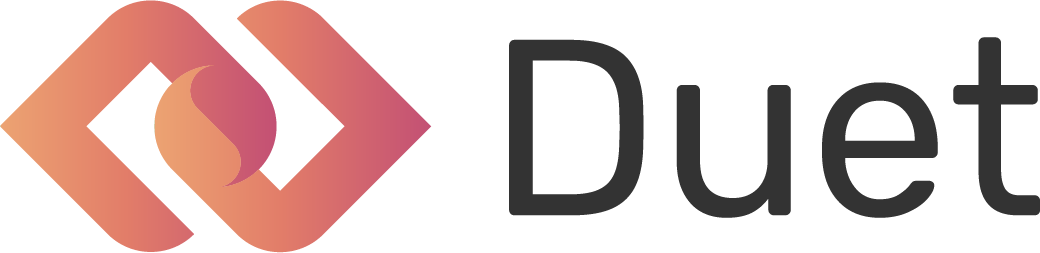

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 


[2021-04-15T19:08:38.353445+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.adjust_sharpness not supported in 0.8.2
[2021-04-15T19:08:38.354200+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.autocontrast not supported in 0.8.2
[2021-04-15T19:08:38.354958+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.equalize not supported in 0.8.2
[2021-04-15T19:08:38.355664+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.invert not supported in 0.8.2
[2021-04-15T19:08:38.356498+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.posterize not supported in 0.8.2
[2021-04-15T19:08:38.357038+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.solarize not supported in 0.8.2


♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)

♫♫♫ > Connecting...


[2021-04-15T19:08:50.698207+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.adjust_sharpness not supported in 0.8.2
[2021-04-15T19:08:50.698811+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.autocontrast not supported in 0.8.2
[2021-04-15T19:08:50.699355+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.equalize not supported in 0.8.2
[2021-04-15T19:08:50.699899+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.invert not supported in 0.8.2
[2021-04-15T19:08:50.700455+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.posterize not supported in 0.8.2
[2021-04-15T19:08:50.701904+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.functional.solarize not supported in 0.8.2
[2021-04-15T19:08:50.857474+0300][CRITICAL][logger]][94318] Skipping torchvision.torchvision.transforms.fun


♫♫♫ > CONNECTED!

♫♫♫ > DUET LIVE STATUS  -  Objects: 0  Requests: 0   Messages: 0  Request Handlers: 0                                olumn", "varType": "str", "varSize": "54", "varShape": "", "varContent": "speed"}, {"varName": "copy", "varType": "DataFrame", "varSize": "7300", "varShape": "(100, 9)", "varContent": "                 time       gFx       gFy       gFz        wx        wy  \\\n756154    7561.545351 -0.384270 -0.151255  0.580285  0.334721 -0.238298   \n881907    8819.076240 -0.307795  0.003134  0.55119"}, {"varName": "duet", "varType": "DomainClient", "varSize": "48", "varShape": "", "varContent": "<DomainClient: <UID: f5dc27cec1ed41b6bf02e62069991dc1>>"}, {"varName": "path", "varType": "str", "varSize": "90", "varShape": "", "varContent": "./Terra-D2-multi-labeled-interpolated.csv"}]


In [1]:
import syft as sy
duet = sy.duet(loopback=True)

In [2]:
import pandas as pd
import numpy as np

path = './Terra-D2-multi-labeled-interpolated.csv'
copy = pd.read_csv(path)
#Cleaning up meaningless data
copy = copy[np.all((copy.label.apply(float.is_integer), copy.label != 0), axis=0)]
copy.label = pd.to_numeric(copy.label.apply(lambda x: x-1), downcast='integer')

for column in copy.columns[1:-1]:
            c_max = copy[column].abs().max()
            if c_max != 0:
                copy[column] = copy[column].apply(lambda x: x/c_max)
                
copy = copy.sample(frac=1)

In [3]:

copy = copy.head(100)
print(copy)

                 time       gFx       gFy       gFz        wx        wy  \
756154    7561.545351 -0.384270 -0.151255  0.580285  0.334721 -0.238298   
881907    8819.076240 -0.307795  0.003134  0.551198  0.047093 -0.046096   
1140683  11406.838071 -0.315842  0.022810  0.528192 -0.012791  0.001881   
1126667  11266.677972 -0.314302  0.023261  0.528027  0.014535 -0.000314   
728505    7285.055155 -0.401234 -0.083235  0.493569  0.057558  0.000000   
...               ...       ...       ...       ...       ...       ...   
1379871  13798.719764 -0.369320  0.060158  0.551528  0.005814 -0.052995   
688644    6886.444873 -0.336086 -0.063387  0.543501  0.032558 -0.128253   
1411169  14111.699985 -0.352985 -0.026923  0.499257 -0.136628 -0.024146   
1100175  11001.757785 -0.316879  0.023180  0.528969  0.009302  0.003763   
695112    6951.124919 -0.271968  0.037019  0.502888 -0.013372 -0.028849   

               wz     speed  label  
756154   0.063474  0.162342      1  
881907   0.033673  0.2432

In [4]:
import torch as th
data = th.FloatTensor(copy.iloc[:, :-1].values).tag("dump_data2")
data = data.tag("DO2 data")
data = data.describe("Dataset2 of 1664159 samples, 8 feature")

target = th.LongTensor(copy.iloc[:, -1:].values.squeeze()).tag("target_data2")
target = target.tag("DO2 target")
target = target.describe("Target2 of 1664159 samples, 1 output")

print(data)
print(target)

tensor([[ 7.5615e+03, -3.8427e-01, -1.5125e-01,  5.8028e-01,  3.3472e-01,
         -2.3830e-01,  6.3474e-02,  1.6234e-01],
        [ 8.8191e+03, -3.0780e-01,  3.1345e-03,  5.5120e-01,  4.7093e-02,
         -4.6096e-02,  3.3673e-02,  2.4329e-01],
        [ 1.1407e+04, -3.1584e-01,  2.2810e-02,  5.2819e-01, -1.2791e-02,
          1.8815e-03,  2.6103e-04,  3.3209e-03],
        [ 1.1267e+04, -3.1430e-01,  2.3261e-02,  5.2803e-01,  1.4535e-02,
         -3.1358e-04, -2.3493e-03,  2.8322e-03],
        [ 7.2851e+03, -4.0123e-01, -8.3235e-02,  4.9357e-01,  5.7558e-02,
          0.0000e+00, -1.7202e-01,  7.5456e-01],
        [ 8.5484e+03, -3.2556e-01,  1.8865e-01,  5.3276e-01,  5.8140e-04,
         -2.6654e-02,  1.7750e-02,  0.0000e+00],
        [ 1.0999e+03, -2.6250e-01, -9.3483e-04,  5.3529e-01, -1.9767e-02,
         -3.1358e-03, -2.4015e-02,  0.0000e+00],
        [ 1.3915e+04, -3.3384e-01,  1.1295e-01,  5.0878e-01,  2.4012e-01,
          5.0486e-02, -3.4978e-01,  3.0553e-01],
        [ 1.3163

In [8]:
print(len(data))

1664159


In [5]:
data_ptr = data.send(duet, pointable=True)
target_ptr = target.send(duet, pointable=True)

In [6]:
duet.requests.add_handler(
    action="accept",
    print_local=True,  # print the result in your notebook
)